# Chapter 2: A first Example - Classifying Flowers

The purpose of this notebook is to look at a first example of a typical data science application, namely **statistical learning**, which is often referred to by its more well-known name **machine learning**. To do so, we look at a very popular example involving the classification of flowers. Albeit simplistic and almost boring in its kind, the example is a rather good one to look at from a beginner's point of view as it does not involve too many decision variables. That makes understanding technicalities and visualizing the data set a lot easier.

## What is Machine Learning

Let's at first review a couple of generic definitions to get started.

Machine learning is the process of **extracting knowledge from data** in an automated fashion.

Typical use cases regard making predictions on new and unseen data or simply understanding a given dataset better by finding patterns.

Central to machine learning is the idea of **automating** the **decision making** from data **without** the user specifying **explicit rules** how these decisions should be made.

That is in direct opposition to what we learned in the "Expressing Logic" section in Chapter 0, where we learned how to implement decision criterions "by hand" with the `if` statement.

<img src="./static/what_is_machine_learning.png" width="60%">

#### Example Applications

<img src="static/examples.png" width="60%">

### Types of Machine Learning

Concete machine learning algorithms are commonly classified into three broad categories that may overlap as well:

<img src="static/3_types_of_machine_learning.png" width="60%">

- **Supervised** (focus of the example in this notebook): Each entry in the dataset comes with a **label**. Examples are a list of emails where spam mail is already marked as such or a sample of handwritten digits. The goal is to use the historic data to make predictions.

- **Unsupervised**: There is no desired output associated with a data entry. In a sense, one can think of unsupervised learning as a means of discovering labels from the data itself. A popular example is the clustering of customer data.

- **Reinforcement**: Conceptually, this can be seen as "learning by doing". Some kind of **reward function** tells how good a predicted outcome is. A rather recent and extremely popular example for his approach is the Alpha Go machine.

### Types of Supervised Learning

Algorithms from the supervised learning category are often broken down further into classification and regression:

<img src="static/classification_vs_regression.png" width="60%">

- In **classification** tasks, the labels are *discrete*, such as "spam" or "no spam" for emails. Often, labels are nominal (e.g., colors of something), or ordinal (e.g., T-shirt sizes in S, M, or L).
- In **regression**, the labels are *continuous*. For example, given a person's age, education, and position, infer his/her salary.

## Example: Iris Flower Classification

In the example, we are given measurments regarding the size of various parts of the so-called Iris flower kind. A concrete flower always belongs to one of three distinct special Iris classes. This example application is about classifying a given flower into one of the three classes by only looking at the measurements.

<img src="static/iris_data.png" width="60%">

### Importing the Data

The `sklearn` library provides several sample datasets, among which is also the Iris dataset.

In a tabular visualization, the dataset could be portrayed somewhat like this:

<img src="static/iris.png" width="50%">

However, the data object imported from `sklearn` is organized slightly different. In particular, the so-called **features** are separated from the **labels**.

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

Using Python's `dir()` function we can inspect the data object, i.e. find out what **attributes** it has.

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

`iris.data` provides us with a `numpy.ndarray`, where the first dimension equals the number of observed flowers (i.e., the **instances**) and the second dimension lists the various features of a flower.

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

To find out what the four features are, we can list them:

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Similarly, we can also print the flowers' labels (a.k.a. targets):

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The three flower classes are encoded with integers. Let's show the corresponding names:

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Simple Visualizations

Since the data is four-dimensional, we cannot visualize all features together. Instead, we can plot the distribution of the flower classes by a single feature using histograms.

In [8]:
import matplotlib.pyplot as plt

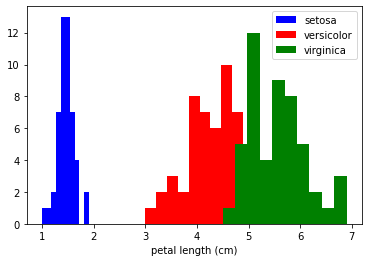

In [9]:
feature_index = 2
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(
        iris.data[iris.target==label, feature_index], 
        label=iris.target_names[label],
        color=color,
    )

plt.xlabel(iris.feature_names[feature_index])
plt.legend(loc='upper right')
plt.show()

Also, we can draw scatter plots of two features.

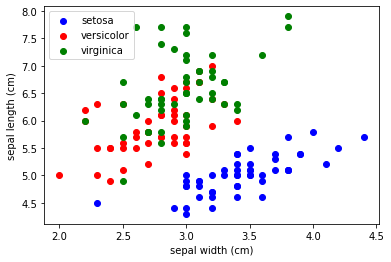

In [10]:
first_feature_index = 1
second_feature_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(
        iris.data[iris.target==label, first_feature_index], 
        iris.data[iris.target==label, second_feature_index],
        label=iris.target_names[label],
        c=color,
    )

plt.xlabel(iris.feature_names[first_feature_index])
plt.ylabel(iris.feature_names[second_feature_index])
plt.legend(loc='upper left')
plt.show()

Using the higher level library `pandas`, one can easily create a so-called **scatterplot matrix**.

In [11]:
import pandas as pd

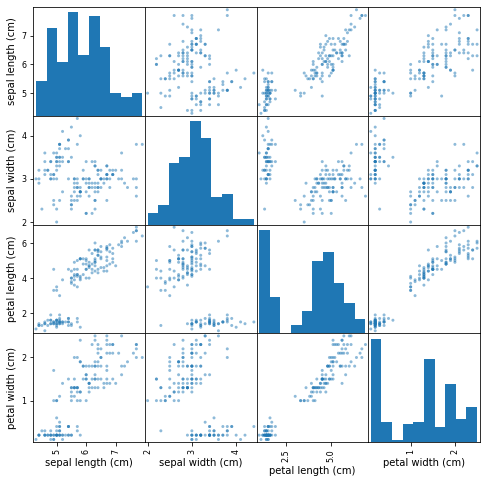

In [12]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

pd.plotting.scatter_matrix(iris_df, figsize=(8, 8));

### Concept of Generalization

The goal of a supervised machine learning model is to make predictions on *new* (i.e., previously unseen) data.

In a real-world application, we are not interested in marking an already labeled email as spam or not. Instead, we want to make the user's life easier by automatically classifying new incoming mail.

In order to get an idea of how good a model **generalizes**, a best practice is to *split* the available data into a **training** and a **test** set. Only the former is used to train the model. Then, predictions are made on the test data and the predictions can be compared with the actual labels.

Common splits are 75/25 or 60/40.

<img src="./static/generalization.png" width="60%">

### Train/Test Split for the Iris data

It is common practice to refer to the feature matrix as `X` and the vector of labels as `y`.

In [13]:
X, y = iris.data, iris.target

A naive splitting approach could be to use array slicing.

In [14]:
X_train, X_test, y_train, y_test = X[0:100, :], X[100:150, :], y[0:100], y[100:150]

However, this would lead to unbalanced label distributions. For example, the test set would only be made up of flowers of the same type.

In [15]:
y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [16]:
import numpy as np

In [17]:
np.bincount(y_test)

array([ 0,  0, 50])

`sklearn` provides a function that not only randomizes the split but also ensures that the resulting label distribution is proportionate to the overall distribution, a concept called **stratification**.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y)

y_test

array([1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2,
       0, 2, 1, 0, 2, 2, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       0])

In [20]:
np.bincount(y_test)

array([15, 15, 15])

### A simple Classification Model: k-Nearest Neighbors

To predict the label for any observation, just determine the k "nearest" observations in the training set (e.g., by Euclidean distance) and use a simple majority vote.

<img src="./static/knn.png" width="60%">

### Training and Predicting with the Iris data

`sklearn` provides a uniform interface for all its classification models. They all have a `.fit()` and a `.predict()` method that abstract away the actual machine learning algorithm.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Let us list the labels predicted for the test set ...

In [23]:
y_pred

array([1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       0])

... and compare them with the actual labels.

In [24]:
y_test

array([1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2,
       0, 2, 1, 0, 2, 2, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       0])

`numpy` shows us the indices where the predictions are wrong.

In [25]:
np.where(y_pred != y_test)

(array([12, 17, 27]),)

Alternatively, we can calculate the fraction of correctly predicted flowers.

In [26]:
np.sum(y_pred == y_test) / len(y_test)

0.9333333333333333

It is important to mention that we can also "predict" the training set. Somehow surprisingly, the model does not get the training set 100% correct.

In [27]:
y_train_pred = knn.predict(X_train)

np.sum(y_train_pred == y_train) / len(y_train)

0.9523809523809523

A visualization reveals that the misclassified flowers are right "at the borderline" between two neighboring clusters of flower classes.

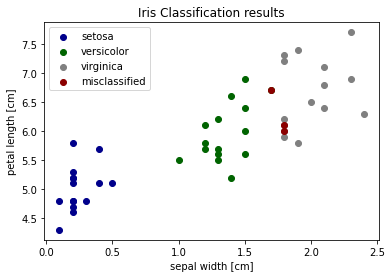

In [28]:
first_feature_index = 3
second_feature_index = 0

correct_idx = np.where(y_pred == y_test)[0]
incorrect_idx = np.where(y_pred != y_test)[0]

colors = ["darkblue", "darkgreen", "gray"]

for n, color in enumerate(colors):
    idx = np.where(y_test == n)[0]
    plt.scatter(
        X_test[idx, first_feature_index],
        X_test[idx, second_feature_index],
        color=color,
        label=iris.target_names[n],
    )

plt.scatter(
    X_test[incorrect_idx, first_feature_index],
    X_test[incorrect_idx, second_feature_index],
    color="darkred",
    label='misclassified',
)

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='best')
plt.title("Iris Classification results")
plt.show()

In practice, the number of neighbors must be chosen before the model is trained. Therefore, it is possible to "optimize" it. This process is referred to as **hyper-parameter tuning**. For the Iris dataset this does not make much of a difference.

In [29]:
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    correct = np.sum(y_pred == y_test) / len(y_test)
    print(i, correct)

1 0.9555555555555556
2 0.9333333333333333
3 0.9333333333333333
4 0.9333333333333333
5 0.9333333333333333
6 0.9333333333333333
7 0.9111111111111111
8 0.9111111111111111
9 0.9111111111111111
10 0.9333333333333333
11 0.9555555555555556
12 0.9555555555555556
13 0.9333333333333333
14 0.9111111111111111
15 0.9333333333333333
16 0.9111111111111111
17 0.9333333333333333
18 0.9111111111111111
19 0.9333333333333333
20 0.9333333333333333
21 0.9333333333333333
22 0.9333333333333333
23 0.9111111111111111
24 0.9555555555555556
25 0.9111111111111111
26 0.9333333333333333
27 0.9111111111111111
28 0.9333333333333333
29 0.9555555555555556
30 0.9111111111111111


### Further Resources on Machine Learning

Depending on the programming language one chooses, the following books are recommended:

- [Python Machine Learning](https://www.amazon.de/Python-Machine-Learning-scikit-learn-TensorFlow/dp/1787125939/ref=sr_1_1?__mk_de_DE=%C3%85M%C3%85%C5%BD%C3%95%C3%91&keywords=python+machine+learning&qid=1575545025&sr=8-1) by Sebastian Raschka

<img src="static/python_ml_book.png">

- [An Introduction to Statistical Learning](http://faculty.marshall.usc.edu/gareth-james/ISL/)

<img src="static/r_ml_book.png">